## Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l2

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Data Cleaning

In [3]:
nutrition_df = pd.read_csv ('/content/drive/My Drive/Colab Notebooks/openfoodfacts_cleaned.csv')
nutrition_df.head()

<ipython-input-3-5495681e8fc2>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  nutrition_df = pd.read_csv ('/content/drive/My Drive/Colab Notebooks/openfoodfacts_cleaned.csv')


,Unnamed: 0,product_name,generic_name,quantity,brands,categories_en,origins_en,countries_en,traces_en,additives_n,...,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,3,Skyr,NaN,480 g,Danone,"Dairies,Fermented foods,Fermented milk product...",NaN,France,NaN,NaN,...,10.0,0.09,0.036,NaN,NaN,NaN,NaN,NaN,NaN,-5.0
1,4,Vitória crackers,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,...,7.8,1.40,0.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,Hamburguesas de ternera 100%,NaN,NaN,NaN,NaN,NaN,Spain,NaN,NaN,...,15.7,2.10,0.840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,Blueberry Cobbler Coffee,NaN,NaN,NaN,NaN,NaN,United States,NaN,NaN,...,0.0,0.00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,...,0.2,2.04,0.816,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
nutrition_df.isna().sum()

,0
Unnamed: 0,0
product_name,0
generic_name,1870120
quantity,1344209
brands,838120
categories_en,931045
origins_en,1897307
countries_en,0
traces_en,1839690
additives_n,1255057


In [5]:
columns_to_drop = [
    'Unnamed: 0', 'generic_name', 'quantity', 'brands', 'categories_en', 'origins_en',
    'traces_en', 'additives_n', 'additives_en', 'food_groups_en', 'ecoscore_score',
    'ecoscore_grade', 'main_category_en', 'monounsaturated-fat_100g',
    'polyunsaturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'vitamin-a_100g',
    'vitamin-c_100g', 'potassium_100g', 'calcium_100g', 'iron_100g',
    'salt_100g', 'carbohydrates_100g', 'countries_en', 'fat_100g','nutrition-score-fr_100g'
]

nutrition_df = nutrition_df.drop(columns=columns_to_drop)
nutrition_df.head()

,product_name,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,Skyr,-5.0,57.0,0.10,3.9,NaN,10.0,0.036,NaN
1,Vitória crackers,NaN,375.0,3.08,15.0,NaN,7.8,0.560,NaN
2,Hamburguesas de ternera 100%,NaN,874.9,6.10,1.0,NaN,15.7,0.840,NaN
3,Blueberry Cobbler Coffee,NaN,0.0,0.00,0.0,0.0,0.0,0.000,NaN
4,Sauce Sweety chili 0%,NaN,21.0,0.00,0.4,NaN,0.2,0.816,NaN


In [6]:
nutrition_df['fruits-vegetables-nuts-estimate-from-ingredients_100g'].fillna(0, inplace=True)
nutrition_df['fiber_100g'].fillna(0, inplace=True)
nutrition_df.head()

<ipython-input-6-12aa7822acf8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nutrition_df['fruits-vegetables-nuts-estimate-from-ingredients_100g'].fillna(0, inplace=True)
<ipython-input-6-12aa7822acf8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

,product_name,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,Skyr,-5.0,57.0,0.10,3.9,0.0,10.0,0.036,0.0
1,Vitória crackers,NaN,375.0,3.08,15.0,0.0,7.8,0.560,0.0
2,Hamburguesas de ternera 100%,NaN,874.9,6.10,1.0,0.0,15.7,0.840,0.0
3,Blueberry Cobbler Coffee,NaN,0.0,0.00,0.0,0.0,0.0,0.000,0.0
4,Sauce Sweety chili 0%,NaN,21.0,0.00,0.4,0.0,0.2,0.816,0.0


In [7]:
nutrition_df.duplicated().sum()

112655

In [8]:
nutrition_df = nutrition_df.drop_duplicates()
nutrition_df = nutrition_df.dropna()
nutrition_df.head()

,product_name,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,Skyr,-5.0,57.0,0.1,3.9,0.0,10.0,0.036,0.0
6,Pur jus de pomme,9.0,63.0,0.0,15.5,0.0,0.2,0.000,0.0
7,Salade de carottes râpées,-4.0,32.0,0.1,3.9,0.0,0.9,0.168,0.0
13,Tarte noix de coco,14.0,381.0,15.5,21.9,4.4,4.6,0.040,0.0
21,Compote de poire,-2.0,157.0,0.0,27.0,3.6,0.6,0.000,0.0


In [9]:
nutrition_df['energy_kj'] = nutrition_df['energy-kcal_100g'] * 4.184
nutrition_df.head()

<ipython-input-9-8dbeb32eaac8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutrition_df['energy_kj'] = nutrition_df['energy-kcal_100g'] * 4.184


,product_name,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,energy_kj
0,Skyr,-5.0,57.0,0.1,3.9,0.0,10.0,0.036,0.0,238.488
6,Pur jus de pomme,9.0,63.0,0.0,15.5,0.0,0.2,0.000,0.0,263.592
7,Salade de carottes râpées,-4.0,32.0,0.1,3.9,0.0,0.9,0.168,0.0,133.888
13,Tarte noix de coco,14.0,381.0,15.5,21.9,4.4,4.6,0.040,0.0,1594.104
21,Compote de poire,-2.0,157.0,0.0,27.0,3.6,0.6,0.000,0.0,656.888


Convert 'nutriscore_score' to categorical

In [10]:
def assign_grade(score):
    if -15 <= score <= -1:
        return "A"
    elif 0 <= score <= 2:
        return "B"
    elif 3 <= score <= 10:
        return "C"
    elif 11 <= score <= 18:
        return "D"
    elif 19 <= score <= 40:
        return "E"
    else:
        return "Invalid Score"

In [11]:
nutrition_df['nutriscore_grade'] = nutrition_df['nutriscore_score'].apply(assign_grade)
nutrition_df.head()

,product_name,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,energy_kj,nutriscore_grade
0,Skyr,-5.0,57.0,0.1,3.9,0.0,10.0,0.036,0.0,238.488,A
6,Pur jus de pomme,9.0,63.0,0.0,15.5,0.0,0.2,0.000,0.0,263.592,C
7,Salade de carottes râpées,-4.0,32.0,0.1,3.9,0.0,0.9,0.168,0.0,133.888,A
13,Tarte noix de coco,14.0,381.0,15.5,21.9,4.4,4.6,0.040,0.0,1594.104,D
21,Compote de poire,-2.0,157.0,0.0,27.0,3.6,0.6,0.000,0.0,656.888,A


In [12]:
nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956387 entries, 0 to 1982823
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   product_name                                           956387 non-null  object 
 1   nutriscore_score                                       956387 non-null  float64
 2   energy-kcal_100g                                       956387 non-null  float64
 3   saturated-fat_100g                                     956387 non-null  float64
 4   sugars_100g                                            956387 non-null  float64
 5   fiber_100g                                             956387 non-null  float64
 6   proteins_100g                                          956387 non-null  float64
 7   sodium_100g                                            956387 non-null  float64
 8   fruits-vegetables-nuts-estimate-from-i

# MODEL

In [13]:
# Features and target
X = nutrition_df[['saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
        'sodium_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'energy_kj']]
y = nutrition_df['nutriscore_grade']

In [14]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts categories (A, B, C, etc.) to integers

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Model1

In [ ]:
def create_model(input_dim, num_classes):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(256, activation='relu',kernel_regularizer=l2(0.01)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes, activation='softmax')  # Softmax for multiclass classification
    ])
    return model

In [ ]:
input_dim = X_train.shape[1]  # Number of features
num_classes = len(label_encoder.classes_)  # Number of unique Nutri-Score grades

# Create the model
model = create_model(input_dim, num_classes)

# Compile the model
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',  # Use this for integer-encoded labels
    metrics=['accuracy']
)

# 4. Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)
#Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/100
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.4768 - loss: 1.2018 - val_accuracy: 0.5656 - val_loss: 0.9762
Epoch 2/100
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.5614 - loss: 0.9921 - val_accuracy: 0.5826 - val_loss: 0.9390
Epoch 3/100
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.5773 - loss: 0.9586 - val_accuracy: 0.5942 - val_loss: 0.9263
Epoch 4/100
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.5866 - loss: 0.9473 - val_accuracy: 0.6142 - val_loss: 0.9148
Epoch 5/100
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.5944 - loss: 0.9362 - val_accuracy: 0.6169 - val_loss: 0.9041
Epoch 6/100
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.6018 - loss: 0.9289 - val_accuracy: 0.6237 - val_loss: 0.8976
Epoch 7/100
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - accuracy: 0.6066 - loss: 0.9230 - val_accuracy: 0.6291 - val_loss: 0.8927
Epoch 8/100
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - ac

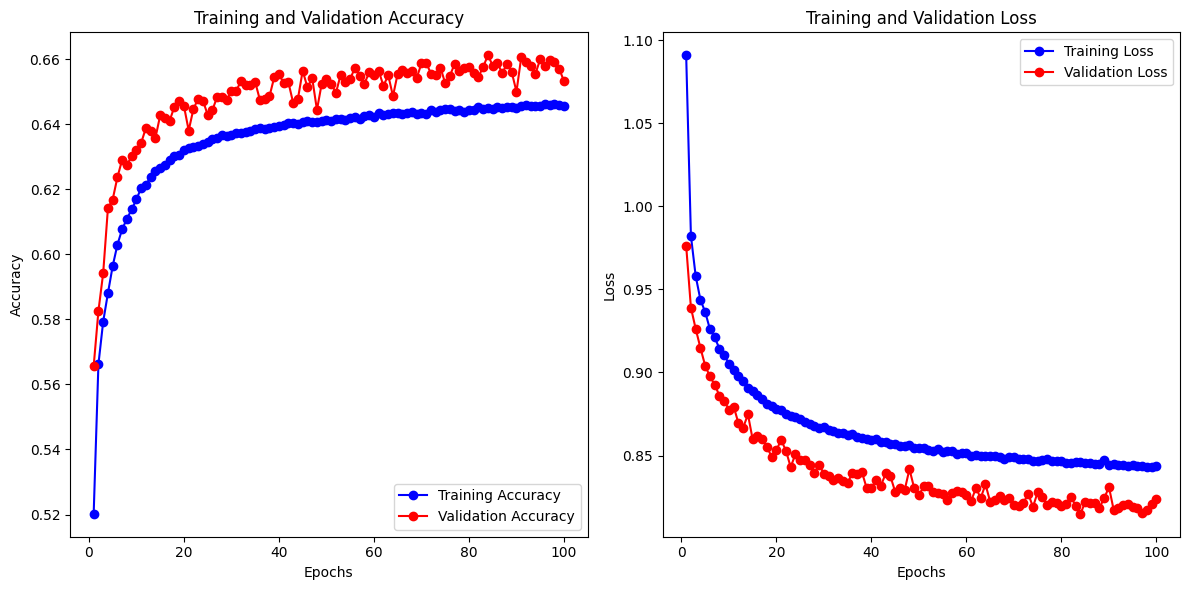

In [ ]:
# Retrieve training metrics from the history object
history_dict = history.history

# Extract values for each metric
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Create a range for the epochs
epochs = range(1, len(accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

## Model2

In [15]:
def create_model2(input_dim, num_classes):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes, activation='softmax')  # Softmax for multiclass classification
    ])
    return model

In [16]:
input_dim = X_train.shape[1]  # Number of features
num_classes = len(label_encoder.classes_)  # Number of unique Nutri-Score grades

# Create the model
model = create_model2(input_dim, num_classes)

# Compile the model
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',  # Use this for integer-encoded labels
    metrics=['accuracy']
)

# 4. Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=32,
    verbose=1
)
#Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/5
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - accuracy: 0.5279 - loss: 1.0623 - val_accuracy: 0.6348 - val_loss: 0.8742
Epoch 2/5
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 74s 3ms/step - accuracy: 0.6188 - loss: 0.8865 - val_accuracy: 0.6388 - val_loss: 0.8631
Epoch 3/5
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - accuracy: 0.6321 - loss: 0.8604 - val_accuracy: 0.6513 - val_loss: 0.8441
Epoch 4/5
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - accuracy: 0.6378 - loss: 0.8465 - val_accuracy: 0.6556 - val_loss: 0.8380
Epoch 5/5
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - accuracy: 0.6434 - loss: 0.8348 - val_accuracy: 0.6579 - val_loss: 0.8319
Test Accuracy: 0.66


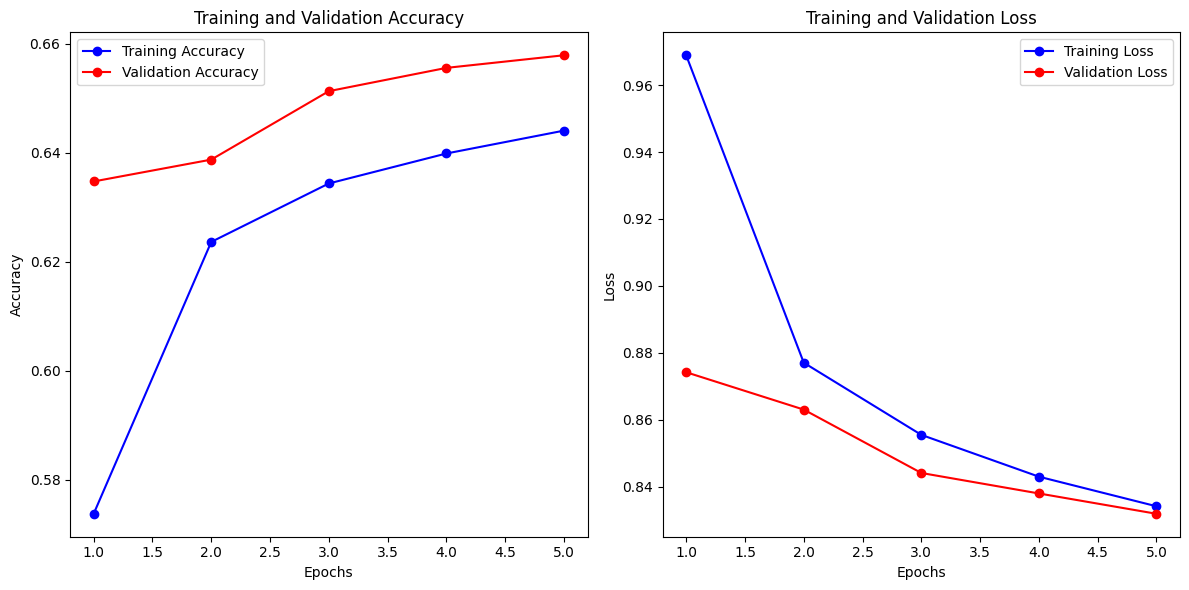

In [17]:
# Retrieve training metrics from the history object
history_dict = history.history

# Extract values for each metric
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Create a range for the epochs
epochs = range(1, len(accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Convert keras model to TFLite

In [19]:
# save model

export_dir = 'model/'

# Save the model
tf.saved_model.save(model, export_dir)

In [20]:
# Select mode of optimization
mode = "Speed"

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [23]:
# Initialize the converter from the SavedModel directory
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimizations (for example, default optimization)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Invoke the converter to generate the TFLite model
tflite_model = converter.convert()

In [22]:
import pathlib

tflite_model_file = pathlib.Path('model/model.tflite')
tflite_model_file.write_bytes(tflite_model)